## Open-Meteo

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

import os
from pprint import pprint

import numpy as np
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq

import matplotlib.pyplot as plt
import seaborn as sns

from openaq_anomaly_prediction.config import Configuration as config
from openaq_anomaly_prediction.utils.logging import logger, ProgressLogger
from openaq_anomaly_prediction.load.openmeteo import client as openmeteo
from openaq_anomaly_prediction.utils.helpers import get_trimestrial_periods

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", 1000)

### Parameters

In [5]:
SEOUL_LOCATIONS_WITH_COORDINATES = {
    "2623440": (37.593749, 126.94953399999999),
    "2622675": (37.53403500000001, 127.13917200000002),
    "2622950": (37.56865, 126.998083),
    "2622916": (37.570632999999994, 126.99678300000001),
    "2623214": (37.65450859999999, 126.7755571),
    "2623052": (37.6104714, 126.9335038),
    "2622627": (37.5203, 126.7737),
    "2622608": (37.516083, 127.019694),
    "2623586": (37.55561, 126.905457),
    "2623504": (37.449479, 127.155512),
    "2622932": (37.527800000000006, 126.7967),
    "2623346": (37.520222, 126.90496699999998),
    "2623422": (37.433169, 127.164372),
    "2622714": (37.4939, 126.7701),
    "2623394": (37.549389, 126.97151899999999),
    "2622851": (37.685514000000005, 126.813441),
    "2622782": (37.576169, 127.02964199999998),
    "2622858": (37.60672399999999, 126.762831),
    "2623344": (37.58495299999999, 127.094283),
    "2622689": (37.65741500000001, 127.067876),
    "2623321": (37.572025, 127.005028),
    "2623557": (37.544639, 127.09570600000002),
    "2623811": (37.474899, 126.898657),
    "2623080": (37.532057, 127.002371),
    "2623112": (37.654278, 127.029333),
    "2623681": (37.4800328, 126.7999056),
    "2623198": (37.49849799999999, 126.88969199999998),
    "2622918": (37.448806, 127.00232900000002),
    "2623154": (37.539283000000005, 127.04094299999998),
    "2622727": (37.526339, 126.896256),
    "2622796": (37.64793, 127.011952),
    "2622827": (37.65292399999999, 127.11586),
    "2623643": (37.452158, 126.884909),
    "2623424": (37.545089, 127.13680599999999),
    "2623444": (37.594755, 127.130141),
    "2623048": (37.452386, 126.90833299999998),
    "2623069": (37.6187, 127.1383),
    "2623563": (37.554936, 126.937619),
    "2622995": (37.476221, 126.86981000000002),
    "2623004": (37.482867, 127.035621),
    "2623465": (37.544656, 126.83509400000001),
    "2623259": (37.542036, 127.049685),
    "2623718": (37.603593, 127.026007),
    "2623345": (37.44310000000001, 126.78840000000001),
    "2622724": (37.4339, 127.12930000000001),
    "2622907": (37.480989, 126.971547),
    "2623532": (37.52328599999999, 126.85868900000001),
    "2622837": (37.564639, 126.975961),
    "2623538": (37.567014, 127.18602299999999),
    "2622586": (37.58016700000001, 127.044856),
    "2622825": (37.6251, 126.84230000000001),
    "2623430": (37.617315, 127.07511999999998),
    "2623116": (37.50268499999999, 127.092385),
    "2623078": (37.666362, 126.886708),
    "2623442": (37.609158, 127.163109),
    "2623194": (37.489495, 126.982489),
    "2622807": (37.4563598, 127.1304652),
    "2623679": (37.56282099999999, 126.826071),
}

pollutants = ["pm25 µg/m³", "co ppm", "no2 ppm", "o3 ppm", "pm10 µg/m³", "so2 ppm"]

In [34]:
trimesters = get_trimestrial_periods(2025)
trimesters

[('2025-01-01T00:00:00+00:00', '2025-03-31T23:59:59+00:00'),
 ('2025-04-01T00:00:00+00:00', '2025-06-30T23:59:59+00:00'),
 ('2025-07-01T00:00:00+00:00', '2025-09-30T23:59:59+00:00'),
 ('2025-10-01T00:00:00+00:00', '2025-12-31T23:59:59+00:00')]

### Requests

In [ ]:
CITY_NAME = "seoul"
run_id = "seoul_2025_T4_2025-10-01_2025-12-31"



year = 2025

start_date = f"{year}-01-01"
start_date = f"{year}-11-15"
end_date = f"{year}-11-30"  # can't be later than today's date

timezone = "+09:00"


# start_date = pd.Timestamp(f"{INT_YEARS[0]}-01-01")
# end_date = pd.Timestamp(f"{INT_YEARS[-1]}-12-31")
# start_date = pd.Timestamp(f"2024-05-01")
# end_date = pd.Timestamp(f"2025-12-31")
# start_date_localized = start_date.tz_localize(timezone)
# end_date_localized = end_date.tz_localize(timezone)


In [163]:
for location_id, coordinates in SEOUL_LOCATIONS_WITH_COORDINATES.items():
    print(f"Location ID: {location_id}, Coordinates: {coordinates}")

Location ID: 2623440, Coordinates: (37.593749, 126.94953399999999)
Location ID: 2622675, Coordinates: (37.53403500000001, 127.13917200000002)
Location ID: 2622950, Coordinates: (37.56865, 126.998083)
Location ID: 2622916, Coordinates: (37.570632999999994, 126.99678300000001)
Location ID: 2623214, Coordinates: (37.65450859999999, 126.7755571)
Location ID: 2623052, Coordinates: (37.6104714, 126.9335038)
Location ID: 2622627, Coordinates: (37.5203, 126.7737)
Location ID: 2622608, Coordinates: (37.516083, 127.019694)
Location ID: 2623586, Coordinates: (37.55561, 126.905457)
Location ID: 2623504, Coordinates: (37.449479, 127.155512)
Location ID: 2622932, Coordinates: (37.527800000000006, 126.7967)
Location ID: 2623346, Coordinates: (37.520222, 126.90496699999998)
Location ID: 2623422, Coordinates: (37.433169, 127.164372)
Location ID: 2622714, Coordinates: (37.4939, 126.7701)
Location ID: 2623394, Coordinates: (37.549389, 126.97151899999999)
Location ID: 2622851, Coordinates: (37.68551400000

In [171]:
test_run_id = "seoul_2025_T4_2025-10-01_2025-12-31"

test_location_id = 2623440
test_location_coordinates = (  # lat, long
    SEOUL_LOCATIONS_WITH_COORDINATES[str(test_location_id)][0],
    SEOUL_LOCATIONS_WITH_COORDINATES[str(test_location_id)][1],
)
test_start_date = f"{year}-11-15"
test_end_date = f"{year}-11-30"  # can't be later than today's date

df_weather = openmeteo.download_weather_data(
    run_id=test_run_id,
    location_id=test_location_id,
    latitude=test_location_coordinates[0],
    longitude=test_location_coordinates[1],
    start_date=test_start_date,
    end_date=test_end_date,
)

{'Date': 'Wed, 17 Dec 2025 12:30:15 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Content-Encoding': 'deflate'}


In [157]:
# data

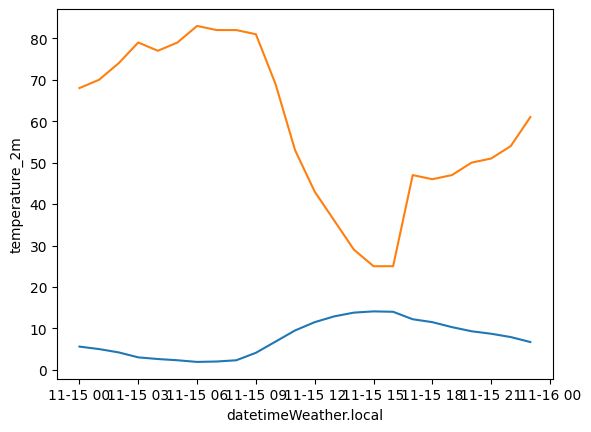

,datetimeWeather.local,datetimeWeather.utc,location_id,weather_latitude,weather_longitude,timezone,elevation,temperature_2m,relative_humidity_2m,is_day
0,2025-11-15 00:00:00+09:00,2025-11-14 15:00:00+00:00,2623440,37.57469,126.96,Asia/Seoul,46.0,5.6,68,0
1,2025-11-15 01:00:00+09:00,2025-11-14 16:00:00+00:00,2623440,37.57469,126.96,Asia/Seoul,46.0,5.0,70,0
2,2025-11-15 02:00:00+09:00,2025-11-14 17:00:00+00:00,2623440,37.57469,126.96,Asia/Seoul,46.0,4.2,74,0
3,2025-11-15 03:00:00+09:00,2025-11-14 18:00:00+00:00,2623440,37.57469,126.96,Asia/Seoul,46.0,3.0,79,0
4,2025-11-15 04:00:00+09:00,2025-11-14 19:00:00+00:00,2623440,37.57469,126.96,Asia/Seoul,46.0,2.6,77,0
5,2025-11-15 05:00:00+09:00,2025-11-14 20:00:00+00:00,2623440,37.57469,126.96,Asia/Seoul,46.0,2.3,79,0
6,2025-11-15 06:00:00+09:00,2025-11-14 21:00:00+00:00,2623440,37.57469,126.96,Asia/Seoul,46.0,1.9,83,0
7,2025-11-15 07:00:00+09:00,2025-11-14 22:00:00+00:00,2623440,37.57469,126.96,Asia/Seoul,46.0,2.0,82,0
8,2025-11-15 08:00:00+09:00,2025-11-14 23:00:00+00:00,2623440,37.57469,126.96,Asia/Seoul,46.0,2.3,82,1
9,2025-11-15 09:00:00+09:00,2025-11-15 00:00:00+00:00,2623440,37.57469,126.96,Asia/Seoul,46.0,4.1,81,1


In [172]:
# The local time seems to check out (comparing historical weather data with expected local times)

days_offset = 0

sns.lineplot(data=df_weather.iloc[24*days_offset:24*(days_offset+1)], x="datetimeWeather.local", y="temperature_2m")
sns.lineplot(data=df_weather.iloc[24*days_offset:24*(days_offset+1)], x="datetimeWeather.local", y="relative_humidity_2m")
plt.show()

display(df_weather.iloc[24*days_offset:24*(days_offset+1)])

In [178]:
from openaq_anomaly_prediction.utils.helpers import get_parquet_filepaths
run_id = "seoul_2025_T4_2025-10-01_2025-12-31"
output_path = os.path.join(run_id, "openmeteo")
# output_path = os.path.join(run_id)
parquet_files = get_parquet_filepaths(output_path)
parquet_files

['/home/deniscck/code/denis-cck/openaq_anomaly_prediction/data/parquet/seoul_2025_T4_2025-10-01_2025-12-31/openmeteo/seoul_2025_T4_2025-10-01_2025-12-31_location_2623440_weather.raw.parquet']

In [173]:
parquet_file = os.path.join(
    config.DATA_PARQUET_PATH,
    run_id,
    f"{run_id}_location_{test_location_id}_weather.raw.parquet",
)

df_weather_check = pd.read_parquet(parquet_file)
df_weather_check.head()

,datetimeWeather.local,datetimeWeather.utc,location_id,weather_latitude,weather_longitude,timezone,elevation,temperature_2m,relative_humidity_2m,is_day
0,2025-11-15 00:00:00+09:00,2025-11-14 15:00:00+00:00,2623440,37.57469,126.96,Asia/Seoul,46.0,5.6,68,0
1,2025-11-15 01:00:00+09:00,2025-11-14 16:00:00+00:00,2623440,37.57469,126.96,Asia/Seoul,46.0,5.0,70,0
2,2025-11-15 02:00:00+09:00,2025-11-14 17:00:00+00:00,2623440,37.57469,126.96,Asia/Seoul,46.0,4.2,74,0
3,2025-11-15 03:00:00+09:00,2025-11-14 18:00:00+00:00,2623440,37.57469,126.96,Asia/Seoul,46.0,3.0,79,0
4,2025-11-15 04:00:00+09:00,2025-11-14 19:00:00+00:00,2623440,37.57469,126.96,Asia/Seoul,46.0,2.6,77,0


In [167]:
df_weather.describe()

,location_id,weather_latitude,weather_longitude,elevation,temperature_2m,relative_humidity_2m
count,312.0,3.120000e+02,3.120000e+02,312.0,312.000000,312.000000
mean,2623440.0,3.757469e+01,1.269600e+02,46.0,0.737179,77.352564
std,0.0,7.116842e-15,1.423368e-14,0.0,3.437400,16.229981
min,2623440.0,3.757469e+01,1.269600e+02,46.0,-10.500000,35.000000
25%,2623440.0,3.757469e+01,1.269600e+02,46.0,-1.525000,67.000000
50%,2623440.0,3.757469e+01,1.269600e+02,46.0,0.800000,78.000000
75%,2623440.0,3.757469e+01,1.269600e+02,46.0,2.900000,91.000000
max,2623440.0,3.757469e+01,1.269600e+02,46.0,10.900000,100.000000


### Create concatenated parquet file

In [ ]:
# Concatenated in the python script directly

In [4]:
# Test what the weather.int.parquet looks like
# run_id = "seoul_2025_T4_2025-10-01_2025-12-31"
# filepath = os.path.join(
#     config.DATA_PARQUET_PATH,
#     run_id,
#     "openmeteo",
#     f"{run_id}_weather.int.parquet",
# )

filepath = os.path.join(config.DATA_EXPORT_PATH, "seoul_weather.int.parquet")

pq_weather = pd.read_parquet(filepath)
pq_weather.head()

,datetimeWeather.local,datetimeWeather.utc,location_id,weather_latitude,weather_longitude,timezone,elevation,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,shortwave_radiation,direct_radiation,diffuse_radiation,global_tilted_irradiance,direct_normal_irradiance,terrestrial_radiation,weather_code,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,vapour_pressure_deficit,et0_fao_evapotranspiration,wind_speed_100m,wind_speed_10m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,is_day
0,2025-01-01 00:00:00+09:00,2024-12-31 15:00:00+00:00,2622608,37.50439,127.030624,Asia/Seoul,31.0,-2.9,71,-7.4,-6.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1023.8,1019.8,0,0,0,0,0.14,0.0,6.2,1.5,216,292,5.8,0
1,2025-01-01 01:00:00+09:00,2024-12-31 16:00:00+00:00,2622608,37.50439,127.030624,Asia/Seoul,31.0,-3.0,72,-7.4,-6.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1023.8,1019.8,0,0,0,0,0.14,0.0,5.6,1.3,180,285,4.3,0
2,2025-01-01 02:00:00+09:00,2024-12-31 17:00:00+00:00,2622608,37.50439,127.030624,Asia/Seoul,31.0,-3.0,72,-7.3,-6.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1023.5,1019.5,10,10,2,0,0.14,0.0,2.0,2.6,129,225,5.0,0
3,2025-01-01 03:00:00+09:00,2024-12-31 18:00:00+00:00,2622608,37.50439,127.030624,Asia/Seoul,31.0,-2.9,70,-7.7,-6.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1023.0,1019.0,8,8,0,0,0.15,0.0,6.7,4.7,133,160,9.0,0
4,2025-01-01 04:00:00+09:00,2024-12-31 19:00:00+00:00,2622608,37.50439,127.030624,Asia/Seoul,31.0,-2.5,69,-7.3,-6.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1022.4,1018.4,44,44,0,0,0.16,0.0,9.3,5.1,157,189,9.4,0


In [5]:
pq_weather["datetimeWeather.local"].nunique()

print(f"LOADED WEATHER FILE: {filepath}")
print(f"Start date: {pq_weather['datetimeWeather.local'].min()}")
print(f"End date: {pq_weather['datetimeWeather.local'].max()}")
print(f"Total records: {len(pq_weather)}")
print(f"Unique locations: {pq_weather['location_id'].nunique()}")

LOADED WEATHER FILE: /home/deniscck/code/denis-cck/openaq_anomaly_prediction/data/export/seoul_weather.int.parquet
Start date: 2024-01-01 00:00:00+09:00
End date: 2025-12-17 23:00:00+09:00
Total records: 998064
Unique locations: 58


In [7]:
full_range = pd.date_range(start=pq_weather['datetimeWeather.local'].min(), end=pq_weather['datetimeWeather.local'].max(), freq='h')
len(full_range)

17208

In [8]:
pq_weather["datetimeWeather.local"].nunique()

17208

In [226]:
all_parameters = [
    "temperature_2m",
    "relative_humidity_2m",
    "dew_point_2m",
    "apparent_temperature",
    "precipitation",
    "rain",
    "snowfall",
    "snow_depth",
    "shortwave_radiation",
    "direct_radiation",
    "diffuse_radiation",
    "global_tilted_irradiance",
    "direct_normal_irradiance",
    "terrestrial_radiation",
    "weather_code",
    "pressure_msl",
    "surface_pressure",
    "cloud_cover",
    "cloud_cover_low",
    "cloud_cover_mid",
    "cloud_cover_high",
    "vapour_pressure_deficit",
    "et0_fao_evapotranspiration",
    "wind_speed_100m",
    "wind_speed_10m",
    "wind_direction_10m",
    "wind_direction_100m",
    "wind_gusts_10m",
    "is_day",
]
all_parameters_string = ",".join(all_parameters)
all_parameters_string

'temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,shortwave_radiation,direct_radiation,diffuse_radiation,global_tilted_irradiance,direct_normal_irradiance,terrestrial_radiation,weather_code,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,vapour_pressure_deficit,et0_fao_evapotranspiration,wind_speed_100m,wind_speed_10m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,is_day'